<a href="https://colab.research.google.com/github/nikosrv3/Bioinformatics-PTPN1-IC50-ML/blob/main/PTPN1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioinformatics Project - Computational Drug Discovery PTPN1_Exploratory_Data_Analysis


---

## **Install conda and rdkit**

In [ ]:
! pip install rdkit

     |████████████████████████████████| 29.5 MB 39.6 MB/s 


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-10-09 20:04:37--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   160MB/s    in 0.5s    

2024-10-09 20:04:37 (160 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

## **Load bioactivity data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
! cd '/content/drive/MyDrive/Colab Notebooks/data'

In [ ]:
! ls '/content/drive/MyDrive/Colab Notebooks/data'

ptpn1_bioactivity_data_curated.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ptpn1_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL301254,COC(=O)c1ccc(C2=CC(=O)C(=O)c3ccccc32)cc1,1540.0,intermediate
1,CHEMBL58435,CC(C)C1=CC(=O)C(=O)c2ccccc21,10130.0,inactive
2,CHEMBL57157,CCN(CC)C(=O)CCC1=C(c2ccccc2)c2ccccc2C(=O)C1=O,610.0,active
3,CHEMBL292444,CCOC(=O)c1ccc(CCC2=C(c3ccccc3)c3ccccc3C(=O)C2=...,1010.0,intermediate
4,CHEMBL60707,O=C1C=C(c2c[nH]c3ccccc23)c2ccccc2C1=O,1130.0,intermediate
...,...,...,...,...
3705,CHEMBL5267587,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,330.0,active
3706,CHEMBL5282928,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,800.0,active
3707,CHEMBL518780,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...,240.0,active
3708,CHEMBL5289855,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...,360.0,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL301254,1540.0,intermediate,COC(=O)c1ccc(C2=CC(=O)C(=O)c3ccccc32)cc1
1,CHEMBL58435,10130.0,inactive,CC(C)C1=CC(=O)C(=O)c2ccccc21
2,CHEMBL57157,610.0,active,CCN(CC)C(=O)CCC1=C(c2ccccc2)c2ccccc2C(=O)C1=O
3,CHEMBL292444,1010.0,intermediate,CCOC(=O)c1ccc(CCC2=C(c3ccccc3)c3ccccc3C(=O)C2=...
4,CHEMBL60707,1130.0,intermediate,O=C1C=C(c2c[nH]c3ccccc23)c2ccccc2C1=O
...,...,...,...,...
3705,CHEMBL5267587,330.0,active,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...
3706,CHEMBL5282928,800.0,active,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...
3707,CHEMBL518780,240.0,active,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...
3708,CHEMBL5289855,360.0,active,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...


## **Calculate Lipinski descriptors**

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,292.290,2.6703,0.0,4.0
1,200.237,2.4914,0.0,2.0
2,361.441,3.9025,0.0,3.0
3,410.469,5.0634,0.0,4.0
4,273.291,3.3650,1.0,2.0
...,...,...,...,...
3705,487.478,6.8644,0.0,3.0
3706,430.633,3.8069,1.0,5.0
3707,425.407,5.2950,0.0,3.0
3708,468.634,6.2837,1.0,5.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,292.290,2.6703,0.0,4.0
1,200.237,2.4914,0.0,2.0
2,361.441,3.9025,0.0,3.0
3,410.469,5.0634,0.0,4.0
4,273.291,3.3650,1.0,2.0
...,...,...,...,...
3705,487.478,6.8644,0.0,3.0
3706,430.633,3.8069,1.0,5.0
3707,425.407,5.2950,0.0,3.0
3708,468.634,6.2837,1.0,5.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,3.710000e+03
mean,3.010332e+06
std,3.931710e+07
min,4.200000e-01
25%,1.692810e+03
50%,9.200000e+03
75%,3.432500e+04
max,9.120108e+08


In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL301254,COC(=O)c1ccc(C2=CC(=O)C(=O)c3ccccc32)cc1,intermediate,292.290,2.6703,0.0,4.0,1540.0
1,CHEMBL58435,CC(C)C1=CC(=O)C(=O)c2ccccc21,inactive,200.237,2.4914,0.0,2.0,10130.0
2,CHEMBL57157,CCN(CC)C(=O)CCC1=C(c2ccccc2)c2ccccc2C(=O)C1=O,active,361.441,3.9025,0.0,3.0,610.0
3,CHEMBL292444,CCOC(=O)c1ccc(CCC2=C(c3ccccc3)c3ccccc3C(=O)C2=...,intermediate,410.469,5.0634,0.0,4.0,1010.0
4,CHEMBL60707,O=C1C=C(c2c[nH]c3ccccc23)c2ccccc2C1=O,intermediate,273.291,3.3650,1.0,2.0,1130.0
...,...,...,...,...,...,...,...,...
3705,CHEMBL5267587,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,active,487.478,6.8644,0.0,3.0,330.0
3706,CHEMBL5282928,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,active,430.633,3.8069,1.0,5.0,800.0
3707,CHEMBL518780,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...,active,425.407,5.2950,0.0,3.0,240.0
3708,CHEMBL5289855,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...,active,468.634,6.2837,1.0,5.0,360.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,3.710000e+03
mean,1.038886e+06
std,8.820535e+06
min,4.200000e-01
25%,1.692810e+03
50%,9.200000e+03
75%,3.432500e+04
max,1.000000e+08


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL301254,COC(=O)c1ccc(C2=CC(=O)C(=O)c3ccccc32)cc1,intermediate,292.290,2.6703,0.0,4.0,5.812479
1,CHEMBL58435,CC(C)C1=CC(=O)C(=O)c2ccccc21,inactive,200.237,2.4914,0.0,2.0,4.994391
2,CHEMBL57157,CCN(CC)C(=O)CCC1=C(c2ccccc2)c2ccccc2C(=O)C1=O,active,361.441,3.9025,0.0,3.0,6.214670
3,CHEMBL292444,CCOC(=O)c1ccc(CCC2=C(c3ccccc3)c3ccccc3C(=O)C2=...,intermediate,410.469,5.0634,0.0,4.0,5.995679
4,CHEMBL60707,O=C1C=C(c2c[nH]c3ccccc23)c2ccccc2C1=O,intermediate,273.291,3.3650,1.0,2.0,5.946922
...,...,...,...,...,...,...,...,...
3705,CHEMBL5267587,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,active,487.478,6.8644,0.0,3.0,6.481486
3706,CHEMBL5282928,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,active,430.633,3.8069,1.0,5.0,6.096910
3707,CHEMBL518780,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...,active,425.407,5.2950,0.0,3.0,6.619789
3708,CHEMBL5289855,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...,active,468.634,6.2837,1.0,5.0,6.443697


In [ ]:
df_final.pIC50.describe()

,pIC50
count,3710.000000
mean,5.136830
std,1.215123
min,1.000000
25%,4.464393
50%,5.036212
75%,5.771393
max,9.376751


Write to CSV

In [ ]:
df_final.to_csv('ptpn1_bioactivity_data_IC50.csv')

### **Removing the 'intermediate' bioactivity class**


In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL58435,CC(C)C1=CC(=O)C(=O)c2ccccc21,inactive,200.237,2.4914,0.0,2.0,4.994391
2,CHEMBL57157,CCN(CC)C(=O)CCC1=C(c2ccccc2)c2ccccc2C(=O)C1=O,active,361.441,3.9025,0.0,3.0,6.214670
5,CHEMBL58292,CN(C1=CC(=O)C(=O)c2ccccc21)c1ccccc1,inactive,263.296,2.9293,0.0,3.0,4.457424
9,CHEMBL60918,COC(=O)CCC1=C(c2ccccc2)c2cc(CCC(=O)OC)ccc2C(=O...,active,406.434,3.3127,0.0,6.0,6.167491
13,CHEMBL57796,COC1=CC(=O)C(=O)c2ccccc21,inactive,188.182,1.4393,0.0,3.0,4.535958
...,...,...,...,...,...,...,...,...
3704,CHEMBL5290130,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,active,534.478,6.7065,0.0,3.0,6.397940
3705,CHEMBL5267587,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,active,487.478,6.8644,0.0,3.0,6.481486
3706,CHEMBL5282928,C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@...,active,430.633,3.8069,1.0,5.0,6.096910
3707,CHEMBL518780,CCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)...,active,425.407,5.2950,0.0,3.0,6.619789


Write to CSV

In [ ]:
df_2class.to_csv('ptpn1_bioactivity_data_IC50.csv')

Save to Drive

In [ ]:
! cp ptpn1_bioactivity_data_IC50.csv "/content/drive/My Drive/Colab Notebooks/data"

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

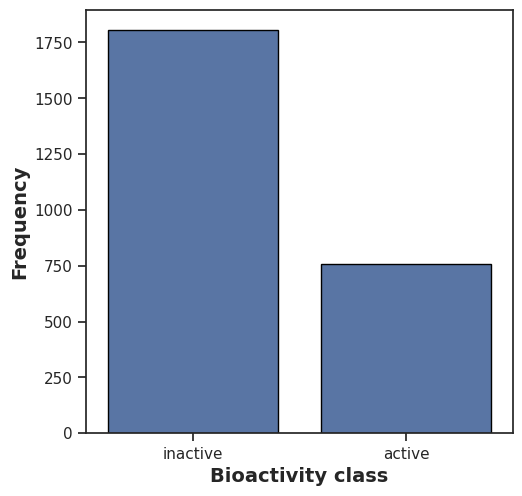

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**


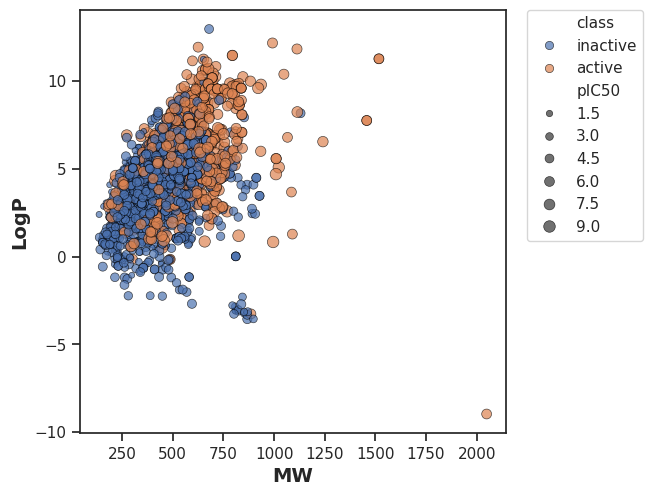

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


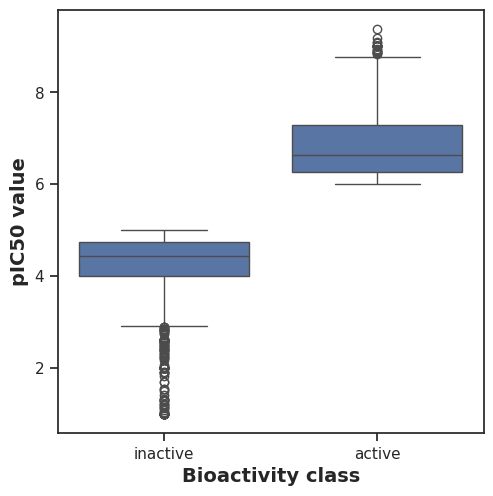

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1368948.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


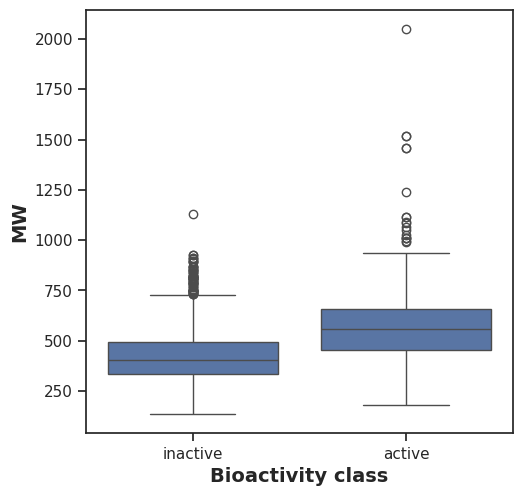

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1052485.0,1.160499e-102,0.05,Different distribution (reject H0)


#### **LogP**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


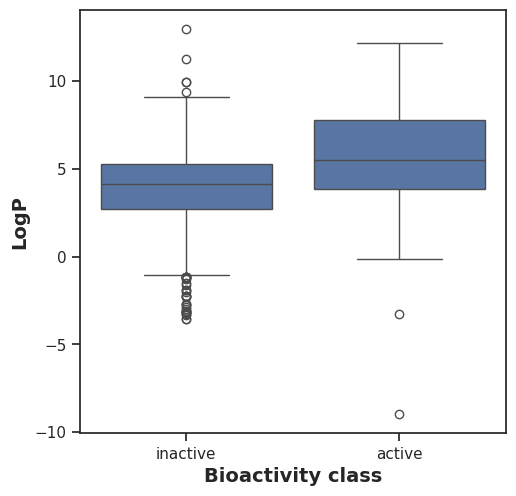

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,958856.5,6.696428e-58,0.05,Different distribution (reject H0)


#### **NumHDonors**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


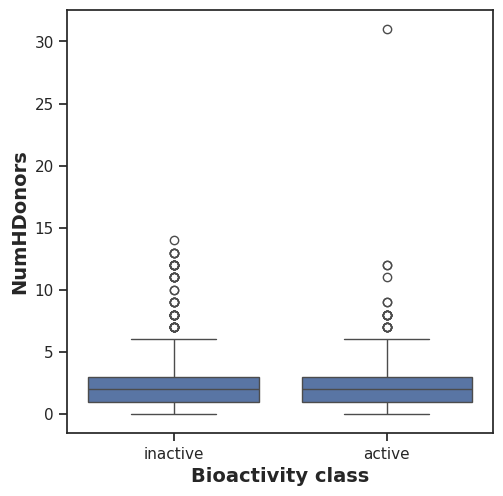

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,754017.5,0.000029,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


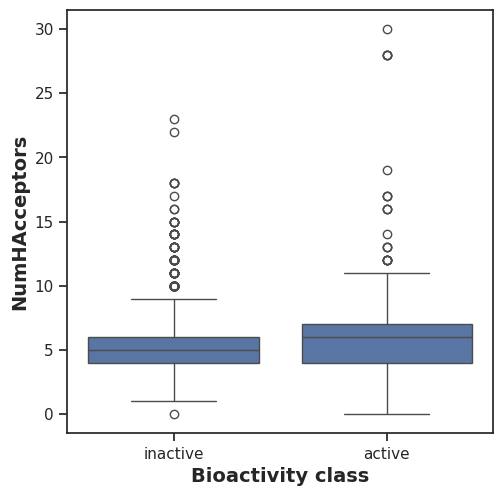

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,803749.5,1.908083e-12,0.05,Different distribution (reject H0)
